In [1]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                           username = "root",
                           password = "souma@123",
                           database = "ecommerse")
cur = db.cursor()


# List all unique cities where customers are located.



In [2]:
query = """select distinct customer_city from customers"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["City"])
print(df)

                       City
0                    franca
1     sao bernardo do campo
2                 sao paulo
3           mogi das cruzes
4                  campinas
...                     ...
4114                 siriji
4115    natividade da serra
4116           monte bonito
4117             sao rafael
4118      eugenio de castro

[4119 rows x 1 columns]


# Count the number of orders placed in 2017

In [3]:
query = """select count(order_id) from orders where year (order_purchase_timestamp) = 2017"""

cur.execute(query)
data = cur.fetchall()
data[0][0]

270606

# Find the total sales per category

In [4]:
query = """SELECT upper(products.product_category) AS category,ROUND(SUM(payments.payment_value),2) AS sales FROM products 
JOIN order_items ON products.product_id = order_items.product_id 
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY category
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["Category","Sales"])
print(df)


                       Category        Sales
0                           ART    371915.16
1                    COOL STUFF   9356376.00
2                GAMES CONSOLES   2345764.55
3                     TELEPHONY   5842584.61
4                 SPORT LEISURE  16705530.71
..                          ...          ...
69               CDS MUSIC DVDS     14393.16
70                   LA CUISINE     34962.36
71  FASHION CHILDREN'S CLOTHING      9428.04
72                     PC GAMER     26093.16
73       INSURANCE AND SERVICES      3894.12

[74 rows x 2 columns]


# Calculate the percentage of orders that were paid in installments.

In [5]:
query = """select (sum( case when payment_installments >=1 then 1 
else 0 end))/count(*)*100 from payments
"""
cur.execute(query)
data = cur.fetchall()
data[0][0]


Decimal('99.9981')

# Count the number of customers from each state

   state  total_customer
0     SP          250476
4     RJ           77112
2     MG           69810
5     RS           32796
3     PR           30270
1     SC           21822
9     BA           20280
13    DF           12840
8     ES           12198
7     GO           12120
15    PE            9912
12    CE            8016
6     PA            5850
16    MT            5442
10    MA            4482
11    MS            4290
21    PB            3216
23    PI            2970
14    RN            2910
19    AL            2478
25    SE            2100
22    TO            1680
20    RO            1518
17    AM             888
24    AC             486
18    AP             408
26    RR             276


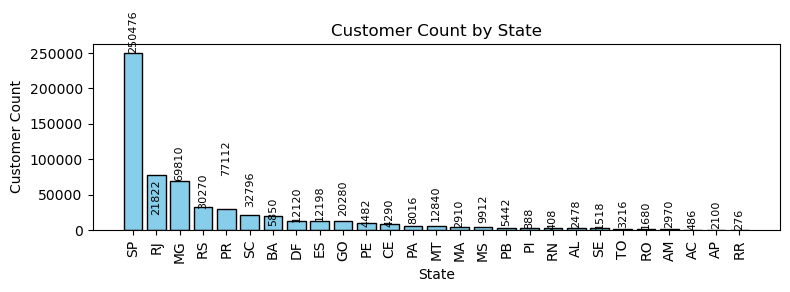

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
query = """
SELECT customer_state, COUNT(customer_id) 
FROM customers 
GROUP BY customer_state
"""
cur.execute(query)
data = cur.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=["state", "total_customer"])

# Sort states by customer count for better visualization
df = df.sort_values(by="total_customer", ascending=False)
print(df)

# Plotting
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], str(y[i]), ha='center', va='bottom', fontsize=8,rotation = 90)

plt.figure(figsize=(8, 3))  # Set figure size
plt.bar(df["state"], df["total_customer"], color='skyblue', edgecolor='black')
add_labels(df["state"], df["total_customer"])
plt.xlabel("State")
plt.ylabel("Customer Count")
plt.title("Customer Count by State")  # Use plt.title() as a function
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()



# Calculate the number of orders per month  in 2018


      months  order_count
0       July        37752
1     August        39072
2   February        40368
3       June        37002
4      March        43266
5    January        43614
6        May        41238
7      April        41634
8  September           96
9    October           24


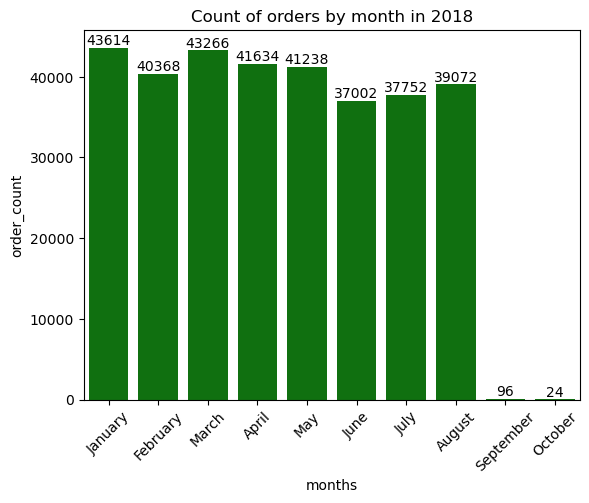

In [7]:
query = """select monthname(order_purchase_timestamp)  months,count(order_id)  order_count
from orders where year(order_purchase_timestamp) = 2018
group by months 

"""

cur.execute(query)
data =cur.fetchall()
df = pd.DataFrame(data,columns = ["months","order_count"])
print(df)
o =["January","February","March","April","May","June","July","August","September","October"]
ax=sns.barplot(x=df["months"],y=df["order_count"],order = o,color = "g")
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.title("Count of orders by month in 2018")

plt.show()

# Find the average number of products per order , grouped by customer city

In [8]:
query = """ with count_per_order as(select orders.order_id,orders.customer_id,count(order_items.order_id) as oc
from orders join order_items on orders.order_id = order_items.order_id
group by  orders.order_id,orders.customer_id)
select customers.customer_city ,round(avg(count_per_order.oc),2) as Averagar_Products
from customers join count_per_order 
on customers.customer_id = count_per_order.customer_id
group by  customers.customer_city  order by Averagar_Products desc 
"""

cur.execute(query)
data =cur.fetchall()
df = pd.DataFrame(data,columns =["Customer_city","Average_orders"])
df.head(10)

,Customer_city,Average_orders
0,padre carvalho,42.00
1,celso ramos,39.00
2,datas,36.00
3,candido godoi,36.00
4,matias olimpio,30.00
5,cidelandia,24.00
6,curralinho,24.00
7,picarra,24.00
8,morro de sao paulo,24.00
9,teixeira soares,24.00


# Calculate the percentage of the total revenue contributed by each product category

In [9]:
query ="""select products.product_category,ROUND((SUM(payments.payment_value)/ (select Sum(payment_value)  from payments))*100,2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on order_items.order_id = payments.order_id
group by products.product_category
order by sales desc;
"""
cur.execute(query)
data =cur.fetchall()
df = pd.DataFrame(data,columns =["Category","Sales_percentage"])
print(df)


                       Category  Sales_percentage
0                bed table bath             64.19
1                 HEALTH BEAUTY             62.12
2          computer accessories             59.42
3          Furniture Decoration             53.60
4               Watches present             53.57
..                          ...               ...
69                     PC Gamer              0.08
70              House Comfort 2              0.06
71               cds music dvds              0.04
72  Fashion Children's Clothing              0.03
73       insurance and services              0.01

[74 rows x 2 columns]


# Identify the correlation between product price and the number of times a product has been purchased.

In [13]:
import numpy as np
query = """select products.product_category,count(order_items.product_id),round(avg(order_items.price),2) AS Average
from products join order_items on products.product_id = order_items.product_id
group by products.product_category
order by Average desc"""

cur.execute(query)
data =cur.fetchall()
df = pd.DataFrame(data,columns =["Category","order-count","price"])

arr1 = df["order-count"]
arr2 = df["price"]
a = np.corrcoef([arr1,arr2])
print("The correlation between product price and the number of times a product has been purchased is",a[0][1])


The correlation between product price and the number of times a product has been purchased is -0.10631514167157566


# Calculate the total revenue by each seller , and rank them by revenue

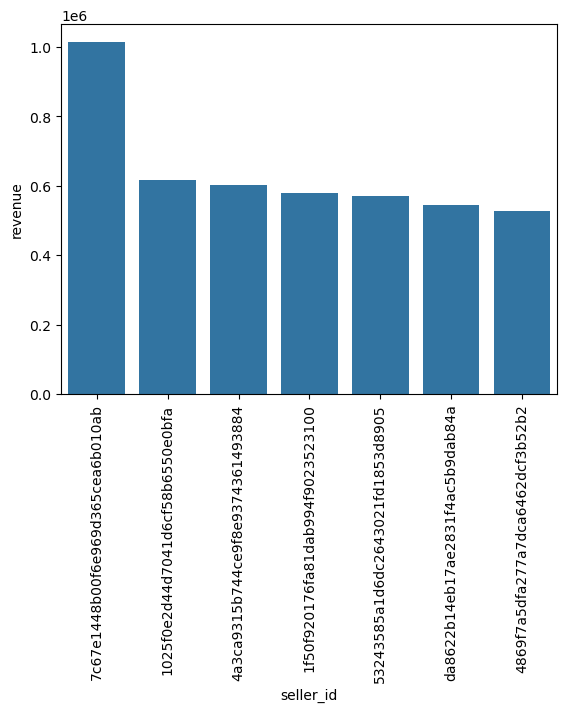

In [16]:
query ="""select *, dense_rank() over (order by revenue desc) as rn from(
select order_items.seller_id,round(sum(payments.payment_value),2) as revenue from order_items
join payments on order_items.order_id = payments.order_id
group by order_items.seller_id)
as a;
"""
cur.execute(query)
data =cur.fetchall()
df = pd.DataFrame(data,columns =["seller_id","revenue","rank"])
df =df.head(7)
sns.barplot (x="seller_id",y="revenue",data = df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history

In [2]:
query = """select customer_id, order_purchase_timestamp,payment, avg(payment) 
over(partition  by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row ) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id)
as a;"""
cur.execute(query)
data =cur.fetchall()
df = pd.DataFrame(data,columns =["customer_id","order_purchase_timestamp","payment","mov_avg"])
print(df)

                              customer_id order_purchase_timestamp  payment  \
0        00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
1        00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
2        00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
3        00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
4        00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   114.74   
...                                   ...                      ...      ...   
1246627  ffffe8b65bbe3087b653a978c870db99      2017-09-29 14:07:03    18.37   
1246628  ffffe8b65bbe3087b653a978c870db99      2017-09-29 14:07:03    18.37   
1246629  ffffe8b65bbe3087b653a978c870db99      2017-09-29 14:07:03    18.37   
1246630  ffffe8b65bbe3087b653a978c870db99      2017-09-29 14:07:03    18.37   
1246631  ffffe8b65bbe3087b653a978c870db99      2017-09-29 14:07:03    18.37   

            mov_avg  
0        114.739998  
1      

# Calculate the cumulative sales per month for each year

In [7]:
query="""select years, months ,payment,round(sum(payment)
over(order by years,months),2) as cumulative from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment  from orders join payments
on orders.order_id = payments.order_id
group by years,months 
order by years, months  asc
) as a;
"""
cur.execute(query)
data =cur.fetchall()
df = pd.DataFrame(data,columns =["years","months","payment","cumulative_sales"])
print(df)

    years  months      payment  cumulative_sales
0    2016       9      3026.88      3.026880e+03
1    2016      10    709085.76      7.121126e+05
2    2016      12       235.44      7.123481e+05
3    2017       1   1661856.48      2.374205e+06
4    2017       2   3502896.11      5.877101e+06
5    2017       3   5398363.19      1.127546e+07
6    2017       4   5013456.35      1.628892e+07
7    2017       5   7115025.84      2.340395e+07
8    2017       6   6135316.56      2.953926e+07
9    2017       7   7108595.03      3.664786e+07
10   2017       8   8092755.84      4.474061e+07
11   2017       9   8733149.40      5.347376e+07
12   2017      10   9356134.56      6.282990e+07
13   2017      11  14338593.60      7.716849e+07
14   2017      12  10540817.76      8.770931e+07
15   2018       1  13380050.15      1.010894e+08
16   2018       2  11909560.08      1.129989e+08
17   2018       3  13915825.44      1.269147e+08
18   2018       4  13929425.77      1.408442e+08
19   2018       5  1

# Calculate the year-over-year growth rate of total sales

In [11]:
query = """ with a as(select year(orders.order_purchase_timestamp)as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)
select years, ((payment - lag(payment,1)over (order by years))/
lag(payment,1)over (order by years)) * 100 from a 
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","yoy % growth"])
print(df)

   years  yoy % growth
0   2016           NaN
1   2017  12112.703759
2   2018     20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [2]:
query = """ with a as (select customers.customer_id,min(orders.order_purchase_timestamp) first_order
from customers join orders on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as(select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order , interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b 
on a.customer_id = b.customer_id
"""
cur.execute(query)
data = cur.fetchall()
data


[(None,)]

# Identify the top 3 customers who spent the most money in each year

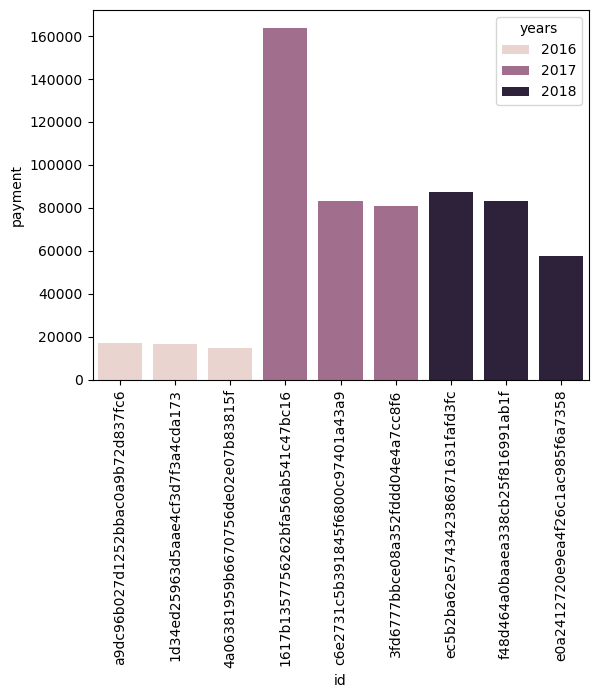

In [7]:
query = """SELECT * FROM (
SELECT years,customer_id, payment, 
DENSE_RANK() OVER (PARTITION BY years ORDER BY payment DESC) AS d_rank
FROM (
SELECT YEAR(orders.order_purchase_timestamp) AS years,
orders.customer_id,SUM(payments.payment_value) AS payment
FROM orders
JOIN payments ON payments.order_id = orders.order_id
GROUP BY YEAR(orders.order_purchase_timestamp),
orders.customer_id) AS inner_subquery
) AS ranked_subquery
WHERE d_rank <= 3;"""

cur.execute(query)
data = cur.fetchall()
df =pd.DataFrame(data, columns=["years","id","payment","rank"])
sns.barplot(x = "id",y = "payment", data = df , hue = "years")
plt.xticks(rotation = 90)
plt.show()